### 1.	Load the data file using pandas. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

## 2.	Check for null values in the data. Get the number of null values for each column.

In [6]:
df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3.	Drop records with nulls in any of the columns. 

In [8]:
df = df.dropna()

In [9]:
df.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [10]:
df.shape

(9360, 13)

## 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them:

- **4.1 Size column** has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
  - 1. Extract the numeric value from the column.
  - 2. Multiply the value by 1,000 if the size is mentioned in Mb.

In [11]:
df["Size"] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in df["Size"]  ]

In [12]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
df["Size"] = 1000 * df["Size"]

In [14]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


####  **4.2 Reviews** is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [17]:
df["Reviews"] = df["Reviews"].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1023.8+ KB


#### **4.3 Installs** field is currently stored as a string and has values like 1,000,000+.
  - 1. Treat 1,000,000+ as 1,000,000.
  - 2. Remove ‘+’ and ‘,’ from the field, then convert it to an integer.

In [19]:
df["Installs"] = [ float(i.replace('+','').replace(',', '')) if '+' in i or ',' in i else float(0) for i in df["Installs"] ]

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1023.8+ KB


In [22]:
df["Installs"] = df["Installs"].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.2+ KB


#### **4.4 Price** field is a string and has a symbol. Remove the ‘$’ sign and convert it to numeric.

In [24]:
df['Price'] = [ float(i.split('$')[1]) if '$' in i else float(0) for i in df['Price'] ]

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), int32(1), object(8)
memory usage: 987.2+ KB


In [27]:
df["Price"] = df["Price"].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int32  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   int32  
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 950.6+ KB


## 5. Sanity checks:

#### 5.1. **Average rating** 
should be between 1 and 5 as only these values are allowed on the Play Store. Drop the rows that have a value outside this range.

In [29]:
df.shape

(9360, 13)

In [30]:
df.drop(df[(df['Reviews'] < 1) & (df['Reviews'] > 5 )].index, inplace = True)

In [31]:
df.shape

(9360, 13)

#### 5.2. **Reviews** 
should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [32]:
df.shape

(9360, 13)

In [33]:
df.drop(df[df['Installs'] < df['Reviews'] ].index, inplace = True)

In [34]:
df.shape

(9353, 13)

#### 5.3. For **free apps** (type = “Free”), the price should not be > 0. Drop any such rows.

In [35]:
df.shape

(9353, 13)

In [36]:
df.drop(df[(df['Type'] =='Free') & (df['Price'] > 0 )].index, inplace = True)

In [37]:
df.shape

(9353, 13)

## 5. Performing univariate analysis:

#### **Boxplot for Price**
  - Are there any outliers? Think about the price of usual apps on the Play Store.

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

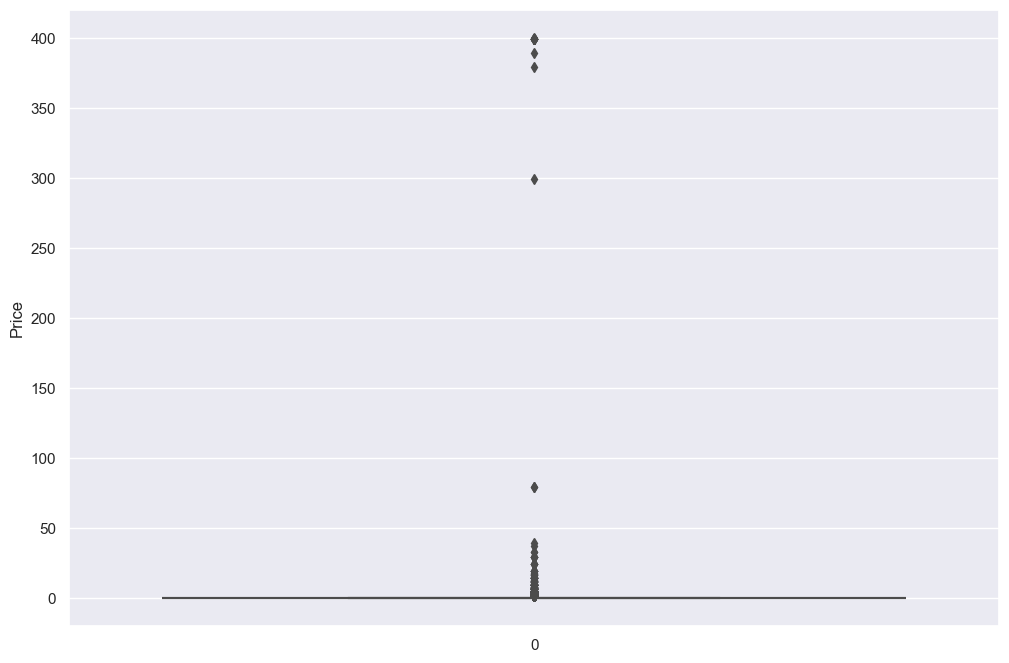

In [39]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(df['Price'])
plt.ylabel('Price')
plt.show()

#### **Boxplot for Reviews**
  - Are there any apps with a very high number of reviews? Do the values seem right?

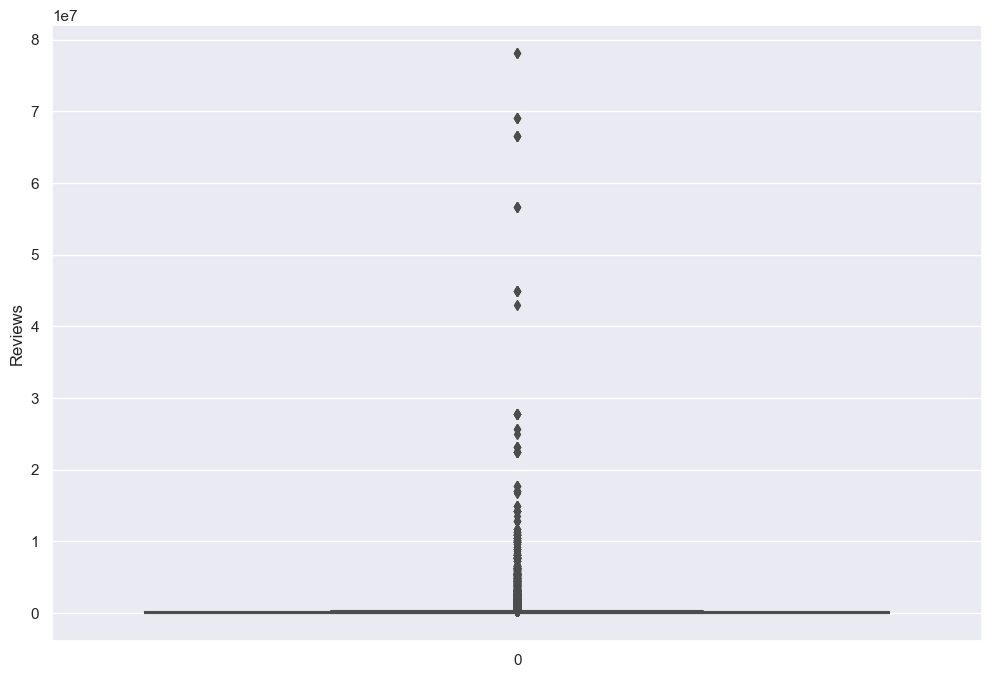

In [40]:
sns.boxplot(df['Reviews'])
plt.ylabel('Reviews')
plt.show()

#### **Histogram for Rating**
  - How are the ratings distributed? Is it more toward higher ratings?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


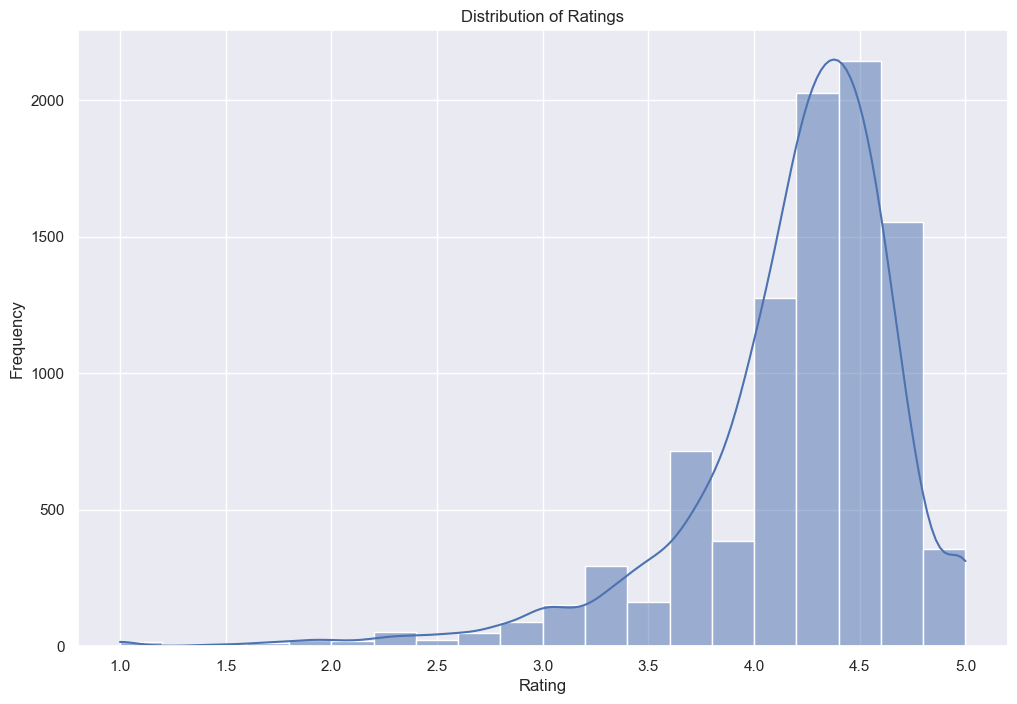

In [41]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df['Rating'], bins=20, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

#### - **Histogram for Size**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


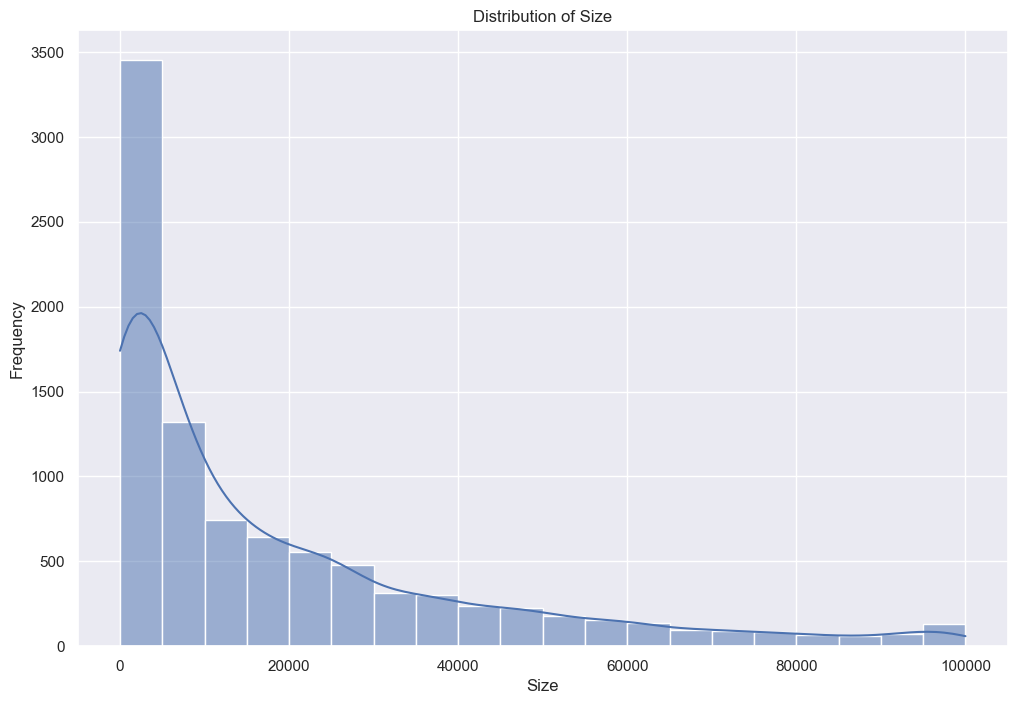

In [42]:
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(df['Size'], bins=20, kde=True)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size')
plt.show()

## 6. Outlier treatment:

#### 6.1. **Price**: 
From the box plot, it seems like there are some apps with very high prices. 

A price of $200 for an application on the Play Store is very high and suspicious!


In [43]:
more = df.apply(lambda x : True
            if x['Price'] > 200 else False, axis = 1) 

In [44]:
more_count = len(more[more == True].index) 

In [45]:
df.shape

(9353, 13)

In [46]:
df.drop(df[df['Price'] > 200].index, inplace = True)

In [47]:
df.shape

(9338, 13)

#### 6.2. **Reviews**: 
Very few apps have a very high number of reviews. These are all-star apps that don’t help with the analysis and, in fact, 
will skew it. Drop records having more than 2 million reviews.

In [48]:
df.drop(df[df['Reviews'] > 2000000].index, inplace = True)

In [49]:
df.shape

(8885, 13)

#### 6.3. **Installs**: 
There seem to be some outliers in this field too. Apps having a very high number of installs should be dropped from the analysis.
- Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.
- Decide a threshold as a cutoff for outliers and drop records having values more than that.

In [50]:
numeric_df = df.select_dtypes(include=['number'])


In [51]:
quantiles = numeric_df.quantile([.1, .25, .5, .70, .90, .95, .99], axis=0)
print(quantiles)


      Rating     Reviews     Size     Installs  Price
0.10     3.5       18.00      0.0       1000.0    0.0
0.25     4.0      159.00   2600.0      10000.0    0.0
0.50     4.3     4290.00   9500.0     500000.0    0.0
0.70     4.5    35930.40  23000.0    1000000.0    0.0
0.90     4.7   296771.00  50000.0   10000000.0    0.0
0.95     4.8   637298.00  68000.0   10000000.0    1.0
0.99     5.0  1462800.88  95000.0  100000000.0    7.0


In [52]:
df.drop(df[df['Installs'] > 10000000].index, inplace = True)

In [53]:
df.shape

(8496, 13)

## 7. Bivariate analysis: 
Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating.
Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between 
rating and the other features.



#### 7.1.	Make scatter plot/joinplot for Rating vs. Price
What pattern do you observe? Does rating increase with price?

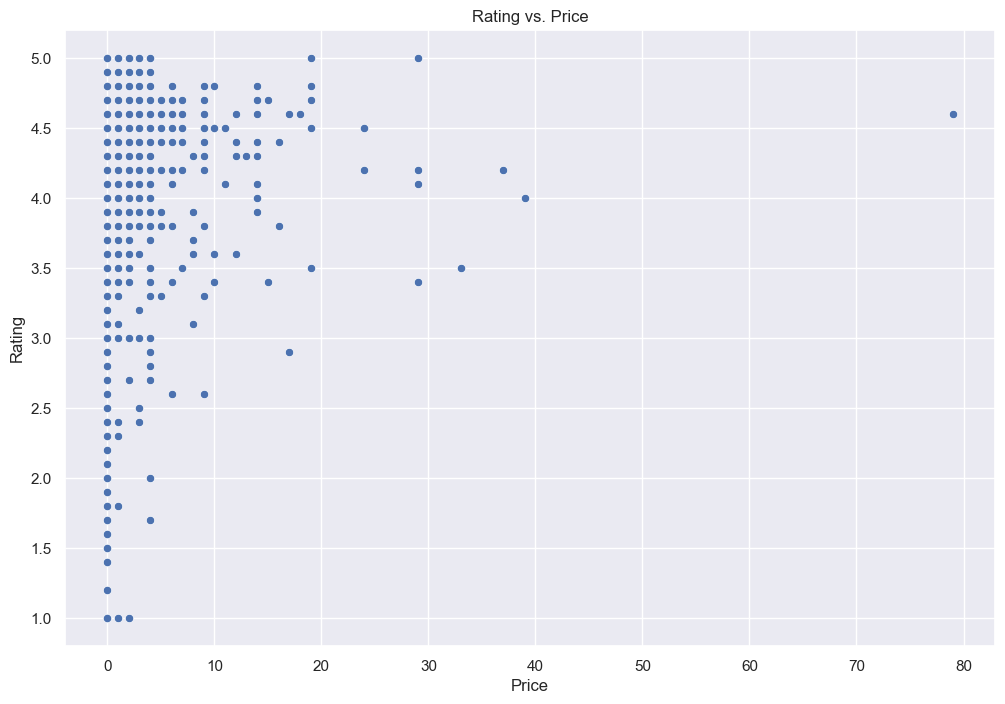

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='Price', y='Rating', data=df)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Rating vs. Price')
plt.show()


### Observation:
From the scatter plot of Rating vs. Price, we observe that there is no clear pattern indicating that higher prices result in higher ratings.
The ratings are fairly spread across different price ranges, suggesting that price may not be a significant predictor of rating.

#### 7.2.	Make scatter plot/joinplot for Rating vs. Size
Are heavier apps rated better?

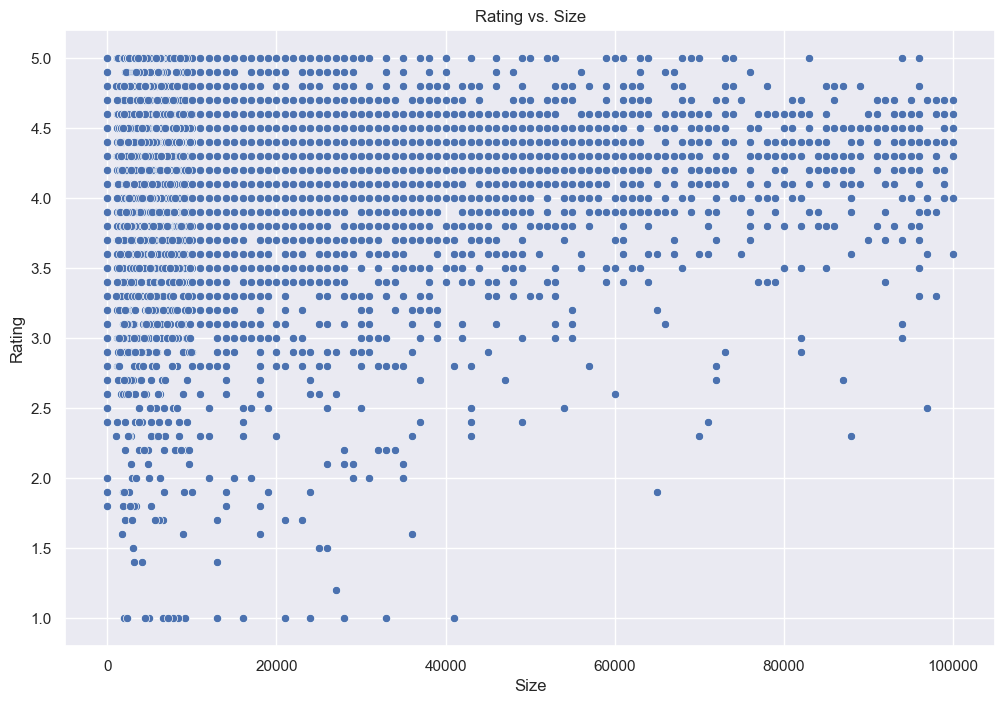

In [55]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='Size', y='Rating', data=df)
plt.xlabel('Size')
plt.ylabel('Rating')
plt.title('Rating vs. Size')
plt.show()


### Observation:
From the scatter plot of Rating vs. Size, we observe that there is no strong correlation between the size of the apps and their ratings.
Heavier apps do not necessarily have better ratings.

### 7.3.	Make scatter plot/joinplot for Rating vs. Reviews
Does more review mean a better rating always?

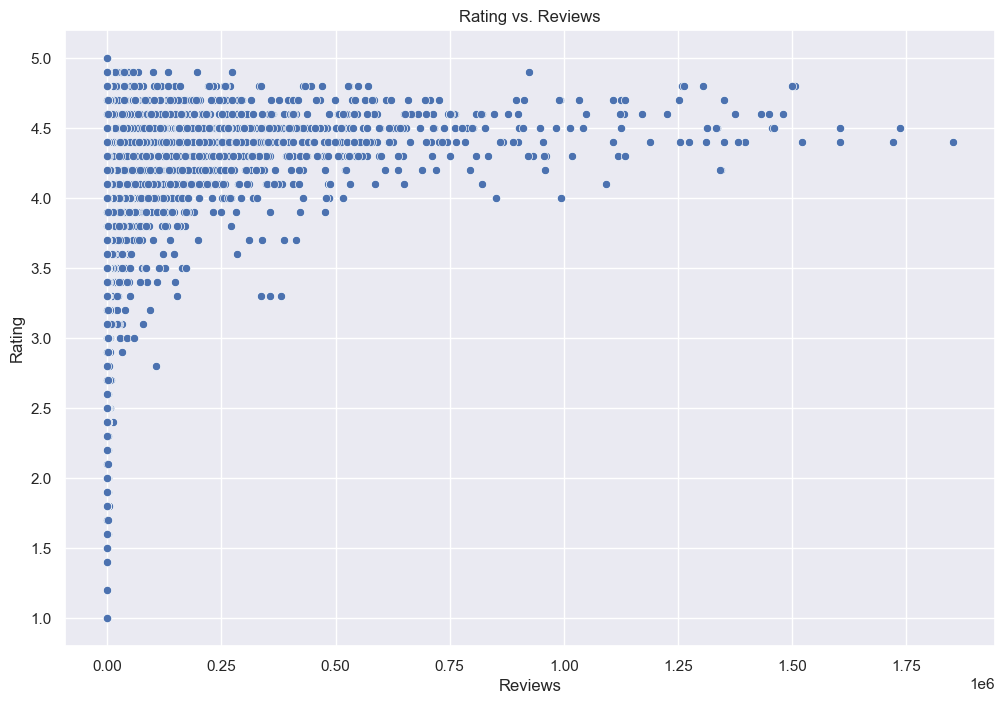

In [56]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Rating vs. Reviews')
plt.show()

### Observation:
From the scatter plot of Rating vs. Reviews, we observe that apps with more reviews tend to have higher ratings. However, this is not always the case, as some apps with fewer reviews also have high ratings. 
Generally, more reviews indicate better ratings, but it is not a definitive rule.

### 7.4.	Make boxplot for Rating vs. Content Rating
Is there any difference in the ratings? Are some types liked better?

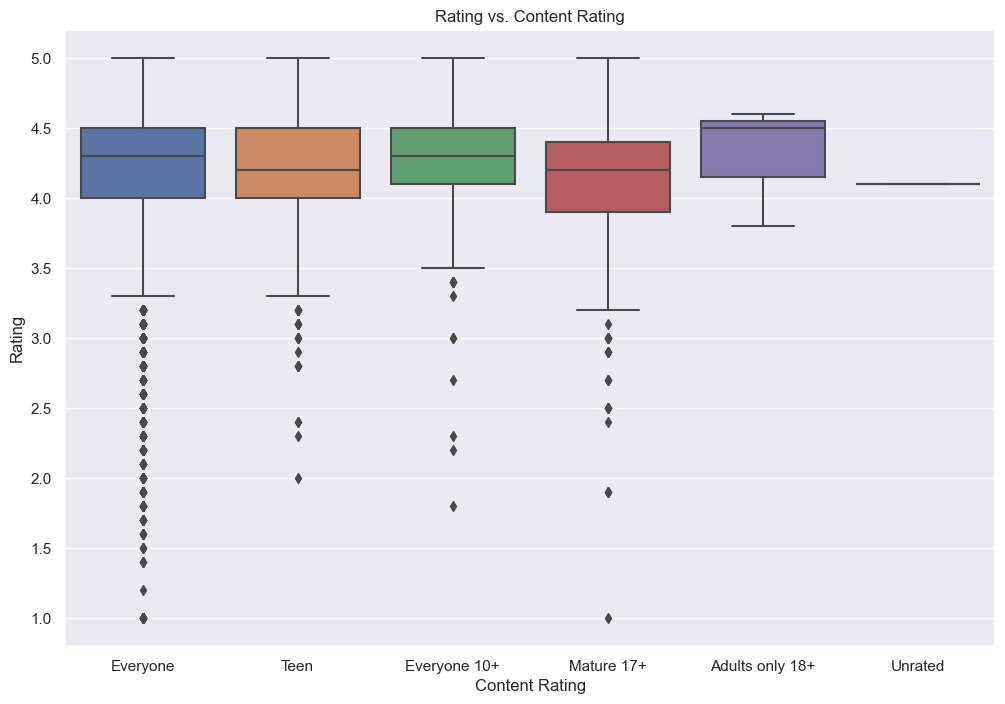

In [57]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='Content Rating', y='Rating', data=df)
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Rating vs. Content Rating')
plt.show()


### Observation:
From the box plot of Rating vs. Content Rating, we observe that there are differences in ratings across different content ratings. 
Some content ratings tend to have higher median ratings compared to others, indicating that certain types of content are liked better by users.

### 7.5. Make boxplot for Ratings vs. Category
Which genre has the best ratings?

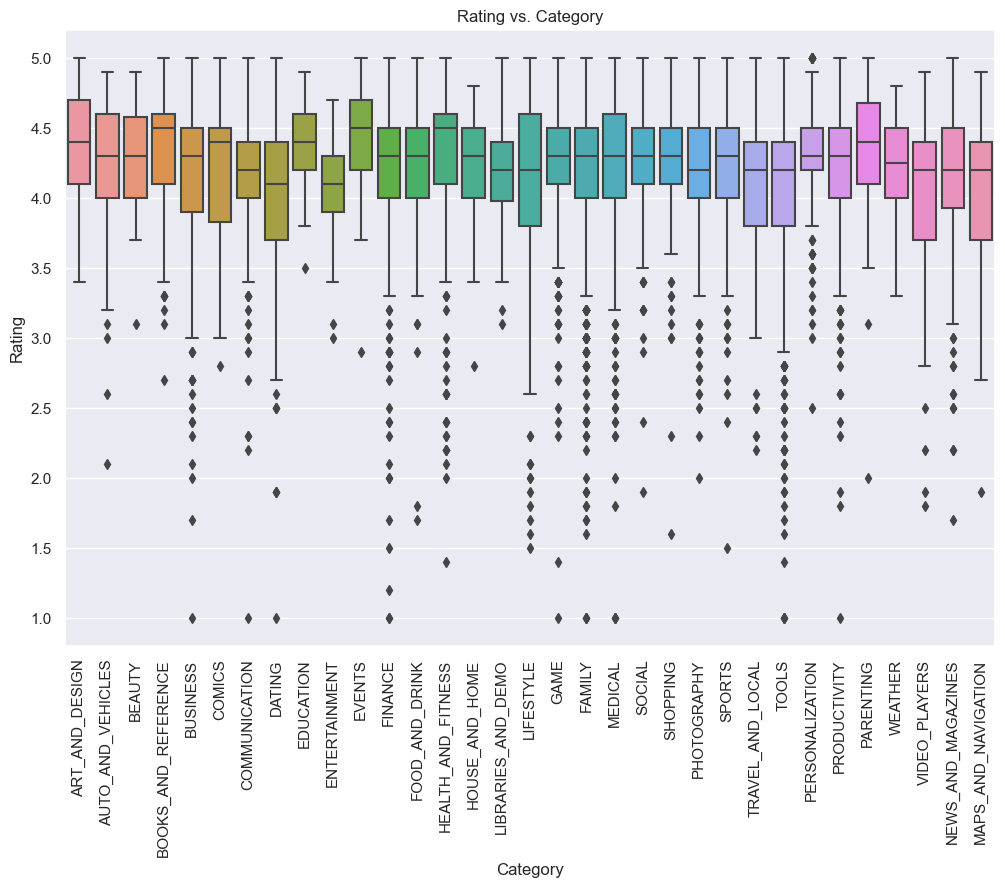

In [58]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x='Category', y='Rating', data=df)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Rating vs. Category')
plt.xticks(rotation=90)
plt.show()

### Observation:
From the box plot of Rating vs. Category, we observe that certain genres have better ratings compared to others.
The median rating varies significantly across categories, indicating that some app genres are generally rated higher than others by users.

## 8. Data preprocessing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

### 8.1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [59]:
import numpy as np

inp1 = df.copy()

In [60]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


### 8.2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [61]:
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])


In [62]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [63]:
inp1 = inp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'])


In [64]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0,Everyone,Art & Design


In [65]:
inp1.shape

(8496, 9)

### 8.3. Get dummy columns for Category, Genres, and Content Rating. 
This needs to be done as the models do not understand categorical data, and all data should be numeric. 
Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [66]:
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'])


In [67]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [68]:
df.shape

(8496, 13)

## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [69]:
from sklearn.model_selection import train_test_split


X = inp2.drop('Rating', axis=1)
y = inp2['Rating']

df_train, df_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [70]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = inp2.drop('Rating', axis=1)
y = inp2['Rating']

# Perform train-test split and separate dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


## 11. Model building
•	Use linear regression as the technique
•	Report the R2 on the train set


In [72]:
pip install pandas scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [74]:
# Load your dataset
df = pd.read_csv('googleplaystore.csv')

# Function to clean 'Size' column
def clean_size(size):
    if pd.isna(size):
        return np.nan
    size = size.replace('M', 'e+6').replace('k', 'e+3').replace(',', '')
    try:
        return float(size)
    except ValueError:
        return np.nan

df['Size'] = df['Size'].apply(clean_size)

In [75]:
# Function to clean 'Installs' column
def clean_installs(installs):
    if pd.isna(installs) or installs == 'Free':
        return np.nan
    installs = installs.replace(',', '').replace('+', '')
    try:
        return int(installs)
    except ValueError:
        return np.nan

df['Installs'] = df['Installs'].apply(clean_installs)

In [76]:
# Function to clean 'Price' column
def clean_price(price):
    if pd.isna(price) or price == 'Everyone':
        return np.nan
    price = price.replace('$', '').replace(',', '')
    try:
        return float(price)
    except ValueError:
        return np.nan

df['Price'] = df['Price'].apply(clean_price)

In [77]:
# Function to clean 'Reviews' column
def clean_reviews(reviews):
    if pd.isna(reviews):
        return np.nan
    reviews = str(reviews).replace(',', '').replace('M', 'e+6').replace('K', 'e+3')
    try:
        return float(reviews)
    except ValueError:
        return np.nan

df['Reviews'] = df['Reviews'].apply(clean_reviews)

In [78]:
# Drop rows where 'Rating' is NaN
df.dropna(subset=['Rating'], inplace=True)


In [79]:
# Impute missing values in numeric columns
imputer = SimpleImputer(strategy='mean')
df[['Size', 'Installs', 'Price', 'Reviews']] = imputer.fit_transform(df[['Size', 'Installs', 'Price', 'Reviews']])


# Drop rows with missing values in other columns
df.dropna(subset=['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], inplace=True)

# Identify categorical columns
categorical_columns = ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [80]:
# Define features (X) and target (y)
X = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

# Drop any remaining rows with NaN in features (just in case)
X = X.dropna()
y = y[X.index]

In [81]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [82]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R^2: {train_r2}')
print(f'Testing R^2: {test_r2}')

Training MSE: 1.3354728451287577e-06
Testing MSE: 0.249232433466711
Training R^2: 0.999995002636025
Testing R^2: 0.03536882207665992


## 12. Make predictions on test set and report R2.

In [83]:
# Predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate R^2 score for the test set
test_r2 = r2_score(y_test, y_test_pred)

print(f'Testing R^2: {test_r2}')


Testing R^2: 0.03536882207665992


## Contact Information

### For any queries or further information, please feel free to reach out to me through the following platforms:



- **LinkedIn**: [Vinay Kumar Panika](https://www.linkedin.com/in/vinaykumarpanika)
- **GitHub**: [Vinaypanika](https://github.com/Vinaypanika)
